<a href="https://colab.research.google.com/github/ylmgrbzz/Daily-Occupancy-Rates-for-Istanbul-Dam-Analysis/blob/main/Estimating_the_Occupancy_Rate_of_Dams_Using_Fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.6 MB/s 
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
    Running setup.py install for fbprophet ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-dqif8djp/fbprophet_52d44cc5c62d45a49d8ad281eedc402c/setup.py'"'"'; __file__='"'"'/tmp/pip-install-dqif8djp/fbprophet_52d44cc5c62d45a49d8ad281eedc402c/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.c

In [3]:
import pandas as pd
import seaborn as sns
from prophet import Prophet 

In [4]:
baraj=pd.read_csv("baraj.csv")

In [5]:
baraj.head(3)

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386


In [6]:
baraj.columns=["tarih","oran","miktar"]

In [9]:
baraj.head(3)

,tarih,oran,miktar
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386


In [11]:
baraj=baraj[["tarih","oran"]]
baraj.head(3)

,tarih,oran
0,2005-01-01,44.62
1,2005-01-02,44.62
2,2005-01-03,44.47


In [12]:
baraj.columns=["ds","y"]

In [7]:
baraj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5941 entries, 0 to 5940
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tarih   5941 non-null   object 
 1   oran    5941 non-null   float64
 2   miktar  5941 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 139.4+ KB


In [8]:
baraj["tarih"]=pd.to_datetime(baraj["tarih"])

In [13]:
model=Prophet()
model.fit(baraj)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future=model.make_future_dataframe(periods=900)

In [15]:
future

,ds
0,2005-01-01
1,2005-01-02
2,2005-01-03
3,2005-01-04
4,2005-01-05
...,...
6834,2023-09-20
6835,2023-09-21
6836,2023-09-22
6837,2023-09-23


In [17]:
tahmin=model.predict(future)
tahmin

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-01,64.943950,48.572848,66.282888,64.943950,64.943950,-8.046361,-8.046361,-8.046361,0.007435,0.007435,0.007435,-8.053796,-8.053796,-8.053796,0.0,0.0,0.0,56.897588
1,2005-01-02,64.982177,48.258296,65.427528,64.982177,64.982177,-7.659335,-7.659335,-7.659335,0.008994,0.008994,0.008994,-7.668330,-7.668330,-7.668330,0.0,0.0,0.0,57.322842
2,2005-01-03,65.020405,48.846583,66.150686,65.020405,65.020405,-7.275663,-7.275663,-7.275663,0.000251,0.000251,0.000251,-7.275914,-7.275914,-7.275914,0.0,0.0,0.0,57.744742
3,2005-01-04,65.058633,49.785780,66.731379,65.058633,65.058633,-6.871777,-6.871777,-6.871777,0.005237,0.005237,0.005237,-6.877014,-6.877014,-6.877014,0.0,0.0,0.0,58.186856
4,2005-01-05,65.096861,49.646867,67.943310,65.096861,65.096861,-6.458449,-6.458449,-6.458449,0.013771,0.013771,0.013771,-6.472220,-6.472220,-6.472220,0.0,0.0,0.0,58.638412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,2023-09-20,18.756137,-105.534546,117.328182,-87.972900,135.183173,-13.923026,-13.923026,-13.923026,0.013771,0.013771,0.013771,-13.936797,-13.936797,-13.936797,0.0,0.0,0.0,4.833111
6835,2023-09-21,18.727084,-102.176534,119.462071,-88.177812,135.334742,-14.067710,-14.067710,-14.067710,-0.029617,-0.029617,-0.029617,-14.038093,-14.038093,-14.038093,0.0,0.0,0.0,4.659374
6836,2023-09-22,18.698031,-102.899045,121.440491,-88.382725,135.486311,-14.143421,-14.143421,-14.143421,-0.006071,-0.006071,-0.006071,-14.137350,-14.137350,-14.137350,0.0,0.0,0.0,4.554610
6837,2023-09-23,18.668977,-105.980223,118.108766,-88.587637,135.637880,-14.228464,-14.228464,-14.228464,0.007435,0.007435,0.007435,-14.235899,-14.235899,-14.235899,0.0,0.0,0.0,4.440513


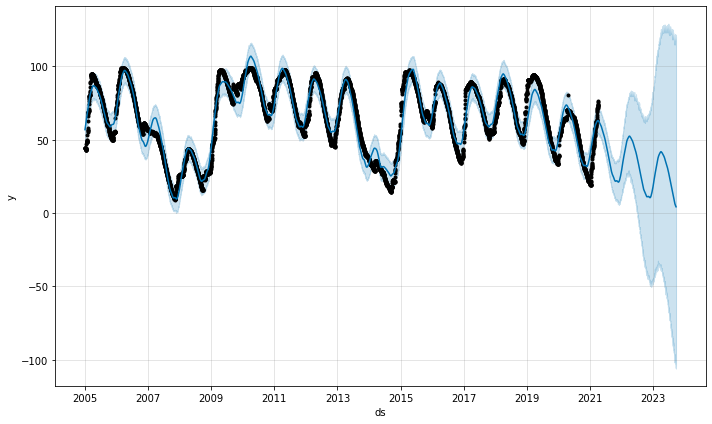

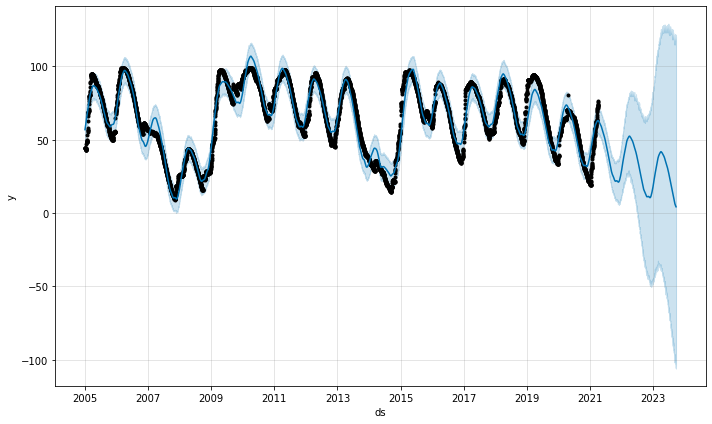

In [19]:
model.plot(tahmin)


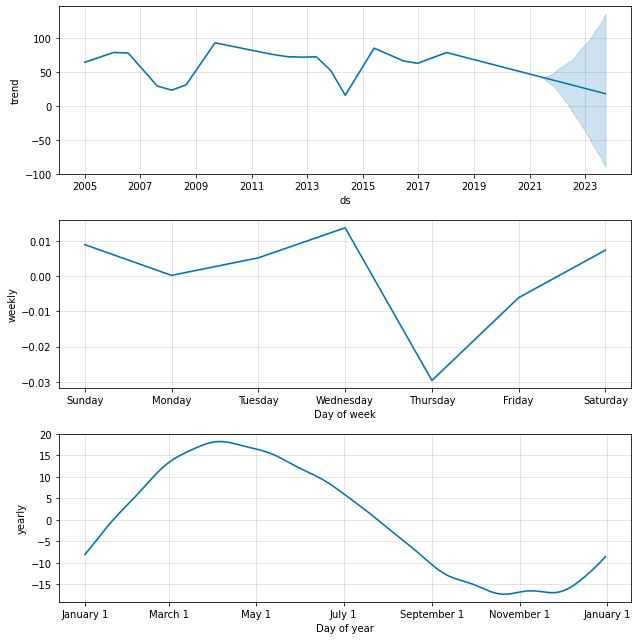

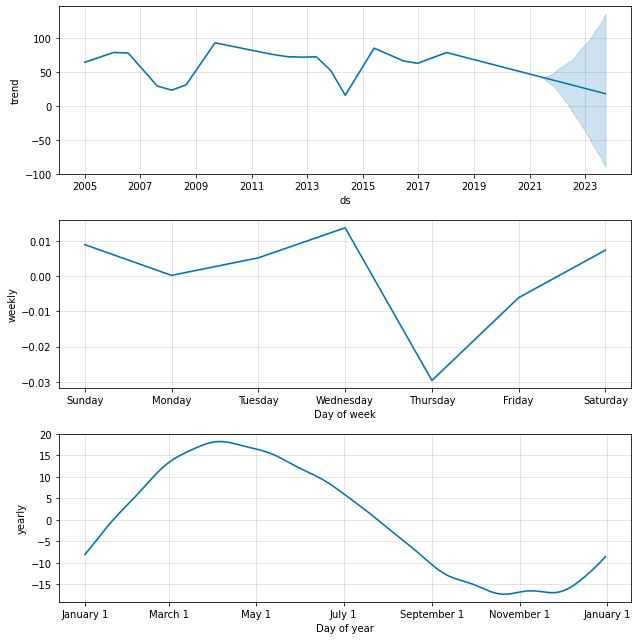

In [20]:
model.plot_components(tahmin)